In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [173]:
df = pd.read_csv('lod02.csv', sep = '\t')
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format = '%Y-%m-%d')

df['OrderYear'] = df['OrderDate'].dt.year

df.head()

,CustomerID,Market,OrderDate,Sales,OrderYear
0,AT-7352,EMEA,2011-01-01,66,2011
1,EM-141402,EU,2011-01-01,45,2011
2,TB-112801,Africa,2011-01-01,408,2011
3,JH-159851,APAC,2011-01-01,114,2011
4,JH-159851,APAC,2011-01-01,55,2011


In [174]:
Cohort = df.groupby(['CustomerID'])['OrderDate'].min().dt.year.reset_index()
Cohort.columns = ['CustomerID', 'CohortYear']
Cohort.head()

,CustomerID,CohortYear
0,AA-103151,2011
1,AA-103152,2012
2,AA-103153,2011
3,AA-103154,2011
4,AA-103751,2011


In [175]:
df2 = pd.merge(df, Cohort, on = ['CustomerID'], how = 'left')
df2.head()

,CustomerID,Market,OrderDate,Sales,OrderYear,CohortYear
0,AT-7352,EMEA,2011-01-01,66,2011,2011
1,EM-141402,EU,2011-01-01,45,2011,2011
2,TB-112801,Africa,2011-01-01,408,2011,2011
3,JH-159851,APAC,2011-01-01,114,2011,2011
4,JH-159851,APAC,2011-01-01,55,2011,2011


In [176]:
f = df2[df2.Market == 'EMEA'].groupby(['OrderYear', 'CohortYear'])['Sales'].sum().reset_index()
f.columns = ['OrderYear', 'CohortYear', 'SalesTotal']
f

,OrderYear,CohortYear,SalesTotal
0,2011,2011,136422
1,2012,2011,64586
2,2012,2012,98820
3,2013,2011,96066
4,2013,2012,58661
5,2013,2013,49927
6,2014,2011,134003
7,2014,2012,68927
8,2014,2013,52952
9,2014,2014,45820


In [177]:
subset = df2[df2.Market == 'EMEA']

cross_tab = pd.crosstab(index = subset['OrderYear'], 
                        columns = subset['CohortYear'], 
                        values = subset['Sales'], 
                        aggfunc = 'sum')
cross_tab

CohortYear,2011,2012,2013,2014
OrderYear,,,,
2011,136422.0,NaN,NaN,NaN
2012,64586.0,98820.0,NaN,NaN
2013,96066.0,58661.0,49927.0,NaN
2014,134003.0,68927.0,52952.0,45820.0


In [178]:
cross_tab_prop = pd.crosstab(index = subset['OrderYear'], 
                             columns = subset['CohortYear'], 
                             values = subset['Sales'], 
                             aggfunc = 'sum',
                             normalize = 'index')
cross_tab_prop

CohortYear,2011,2012,2013,2014
OrderYear,,,,
2011,1.000000,0.000000,0.000000,0.000000
2012,0.395249,0.604751,0.000000,0.000000
2013,0.469407,0.286635,0.243958,0.000000
2014,0.444157,0.228461,0.175511,0.151872


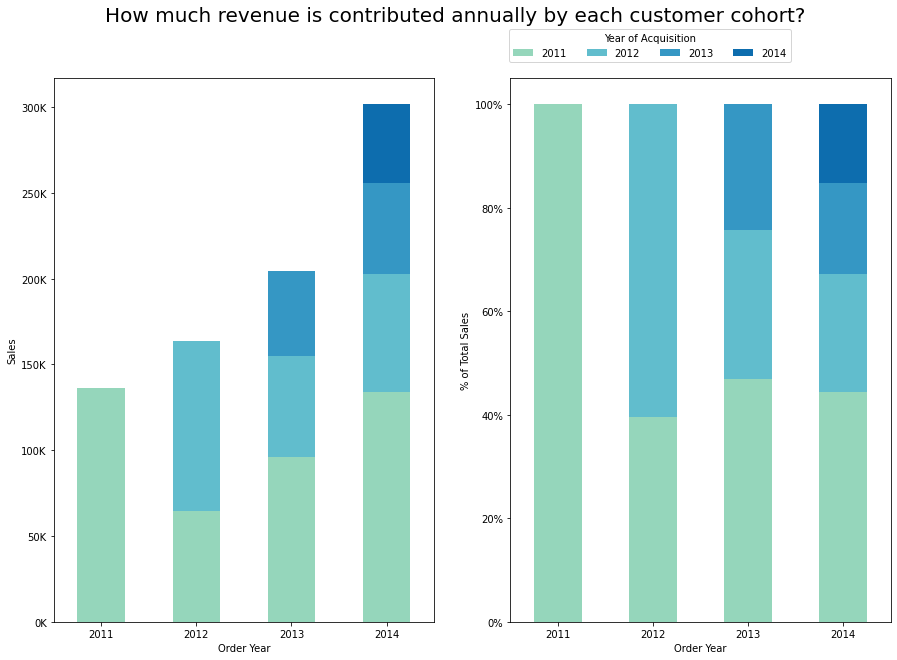

In [179]:
color = sns.color_palette('GnBu')[2:] #['#7ec8e1', '#418dbb', '#1c5f9e', '#26456e']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))

fig.suptitle('How much revenue is contributed annually by each customer cohort? ', fontsize = 20)

cross_tab.plot(kind = 'bar', stacked = True, color = color, ax = ax1)

ax1.set_xlabel("Order Year")
ax1.set_ylabel("Sales")
ax1.set_xticklabels(cross_tab.index, rotation = 0)
# .gca() also works
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : format(int(x)/1000, ',.0f') + 'K'))
ax1.legend_.remove()



cross_tab_prop.plot(kind = 'bar', stacked = True, color = color, ax = ax2)

ax2.set_xlabel("Order Year")
ax2.set_ylabel("% of Total Sales")
ax2.set_xticklabels(cross_tab_prop.index, rotation = 0)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : format(x, ',.0%')))
ax2.legend(loc = "upper right", title = "Year of Acquisition", bbox_to_anchor = (0.75, 1.1), ncol = 4)



plt.show()